# 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ、300次元）をダウンロードし、"United States"の単語ベクトルを表示せよ。ただし、"United States"は内部的には"United_States"と表現されていることに注意せよ。

In [5]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format(
    "data\GoogleNews-vectors-negative300.bin",
    binary=True,
)

print(model["United_States"])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 51. 単語の類似度

"United States"と"U.S."のコサイン類似度を計算せよ。

In [ ]:
import torch
import gensim
from torch.nn.functional import cosine_similarity as torch_cosine_similarity

model = gensim.models.KeyedVectors.load_word2vec_format(
    "data\GoogleNews-vectors-negative300.bin", binary=True
)

vec1 = torch.from_numpy(model["United_States"])
vec2 = torch.from_numpy(model["U.S."])

# 次元を合わせて類似度を計算（1次元Tensor → 2次元バッチ）
similarity = torch_cosine_similarity(vec1.unsqueeze(0), vec2.unsqueeze(0)).item()

print(f"Cosine similarity: {similarity:.4f}")

Cosine similarity: 0.7311


## 52. 類似度の高い単語10件

"United States"とコサイン類似度が高い10語と、その類似度を出力せよ。

In [ ]:
from pprint import pprint
import torch
import gensim
from torch.nn.functional import cosine_similarity as torch_cosine_similarity

model = gensim.models.KeyedVectors.load_word2vec_format(
    "data\GoogleNews-vectors-negative300.bin", binary=True
)

similarity_list = model.most_similar("United_States", topn=10)
pprint(similarity_list)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]


## 53. 加法構成性によるアナロジー

"Spain"の単語ベクトルから"Madrid"のベクトルを引き、"Athens"のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [ ]:
from pprint import pprint
import torch
import gensim
from torch.nn.functional import cosine_similarity as torch_cosine_similarity

model = gensim.models.KeyedVectors.load_word2vec_format(
    "data\GoogleNews-vectors-negative300.bin", binary=True
)

similarity_list = model.most_similar(
    positive=["Spain", "Athens"], negative=["Madrid"], topn=10
)
pprint(similarity_list)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]


## 54. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし、国と首都に関する事例（`: capital-common-countries`セクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [13]:
from pprint import pprint
import torch
import numpy as np
import gensim
from tqdm import tqdm  

model = gensim.models.KeyedVectors.load_word2vec_format(
    "data/GoogleNews-vectors-negative300.bin", binary=True
)

analogies = dict()
buff = []
key = None

with open("data/questions-words.txt") as f:
    total_lines = sum(1 for _ in f)

with open("data/questions-words.txt") as f:
    for line in tqdm(f.readlines(), total=total_lines):
        ws = line.strip().split()
        if not ws:  # 空行をスキップ
            continue

        if ws[0] == ":":
            if key:
                analogies[key] = buff
                buff = []
            key = ws[1]
        else:
            try:
                v1 = model[ws[0]]
                v2 = model[ws[1]]
                v3 = model[ws[2]]

                # 正規化
                v1 = v1 / np.linalg.norm(v1)
                v2 = v2 / np.linalg.norm(v2)
                v3 = v3 / np.linalg.norm(v3)

                v0 = v2 - v1 + v3
                
                rst = model.most_similar(
                    positive=[ws[1], ws[2]], negative=[ws[0]], topn=1
                )
                pred, sim = rst[0]
                buff.append([*ws, v0, pred, sim])
            except KeyError as e:
                # 単語がモデルに存在しない場合はスキップ
                print(f"KeyError: {e}")

    # 最後のカテゴリを追加
    if key:
        analogies[key] = buff

for key, vals in analogies.items():
    print(f"* {key} ({len(vals)}件)")

    if not vals:
        print("  データなし")
        continue

    vals_sorted = sorted(vals, key=lambda v: v[6], reverse=True)  # 類似度でソーティング

    for v in vals_sorted[:5]:
        print(f"  {v[1]} - {v[0]} + {v[2]} -> {v[5]} (sim={v[6]:.3f}, correct: {v[3]})")

    if len(vals_sorted) > 10:
        print("  ...")

    for v in vals_sorted[-5:]:
        print(f"  {v[1]} - {v[0]} + {v[2]} -> {v[5]} (sim={v[6]:.3f}, correct: {v[3]})")

    print() 

100%|██████████| 19558/19558 [49:35<00:00,  6.57it/s] 

* capital-common-countries (506件)
  Japan - Tokyo + Moscow -> Russia (sim=0.886, correct: Russia)
  Russia - Moscow + Tehran -> Iran (sim=0.878, correct: Iran)
  Russia - Moscow + Tokyo -> Japan (sim=0.877, correct: Japan)
  Russia - Moscow + Beijing -> China (sim=0.869, correct: China)
  Cuba - Havana + Tehran -> Iran (sim=0.864, correct: Iran)
  ...
  Japan - Tokyo + Bern -> Switzerland (sim=0.483, correct: Switzerland)
  China - Beijing + Bern -> Bern_NC (sim=0.466, correct: Switzerland)
  England - London + Bern -> Hanover (sim=0.453, correct: Switzerland)
  Iraq - Baghdad + Bern -> coach_Bobby_Curlings (sim=0.435, correct: Switzerland)
  Afghanistan - Kabul + Bern -> Bern_NC (sim=0.423, correct: Switzerland)

* capital-world (4524件)
  Ukraine - Kiev + Moscow -> Russia (sim=0.888, correct: Russia)
  Russia - Moscow + Tehran -> Iran (sim=0.878, correct: Iran)
  Russia - Moscow + Tokyo -> Japan (sim=0.877, correct: Japan)
  Armenia - Yerevan + Baku -> Azerbaijan (sim=0.867, correct: 

In [2]:
from pprint import pprint
import gensim
from tqdm import tqdm

# Word2Vecモデルの読み込み
model = gensim.models.KeyedVectors.load_word2vec_format(
    "data/GoogleNews-vectors-negative300.bin", binary=True
)

# capital-common-countries のセクションだけ処理
analogies = []
with open("data/questions-words.txt") as f:
    lines = f.readlines()

processing = False

for line in tqdm(lines, total=len(lines)):
    ws = line.strip().split()
    if not ws:
        continue

    if ws[0] == ":":
        processing = ws[1] == "capital-common-countries"
        continue

    if not processing:
        continue

    # 三語すべてがモデルにあるか確認
    if not all(w in model for w in ws[:3]):
        continue

    try:
        # アナロジー推論: vec2 - vec1 + vec3 ≈ ?
        result = model.most_similar(positive=[ws[1], ws[2]], negative=[ws[0]], topn=1)
        predicted_word, similarity = result[0]
        analogies.append([*ws, predicted_word, similarity])
    except KeyError:
        continue  # KeyError が出たらスキップ

# 類似度で降順ソート
analogies_sorted = sorted(analogies, key=lambda x: x[5], reverse=True)

# 上位5件
for v in analogies_sorted[:5]:
    print(f"  {v[1]} - {v[0]} + {v[2]} -> {v[4]} (sim={v[5]:.3f}, correct: {v[3]})")

100%|██████████| 19558/19558 [01:07<00:00, 288.02it/s]

  Japan - Tokyo + Moscow -> Russia (sim=0.886, correct: Russia)
  Russia - Moscow + Tehran -> Iran (sim=0.878, correct: Iran)
  Russia - Moscow + Tokyo -> Japan (sim=0.877, correct: Japan)
  Russia - Moscow + Beijing -> China (sim=0.869, correct: China)
  Cuba - Havana + Tehran -> Iran (sim=0.864, correct: Iran)


## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [ ]:
cor_sem = 0  # 意味的アナロジーの正解数
tot_sem = 0  # 意味的アナロジーの総数
cor_syn = 0  # 文法的アナロジーの正解数
tot_syn = 0  # 文法的アナロジーの総数

for key, vals in analogies.items():
    if key[:4] == "gram":
        tot_syn += len(vals)
        cor_syn += len(list(filter(lambda v: v[3] == v[5], vals)))  
    else:
        tot_sem += len(vals)
        cor_sem += len(list(filter(lambda v: v[3] == v[5], vals)))

print(f"accuracy for semantic analogies: {cor_sem/tot_sem}")
print(f"accuracy for syntactic analogies: {cor_syn/tot_syn}")

accuracy for semantic analogies: 0.7308602999210734
accuracy for syntactic analogies: 0.7400468384074942


## 56. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [2]:
import gensim
from gensim.models import KeyedVectors
import pandas as pd
from scipy.stats import spearmanr
import numpy as np

model = KeyedVectors.load_word2vec_format(
    "data/GoogleNews-vectors-negative300.bin", binary=True
)

# WordSim353のデータを読み込む
df = pd.read_csv("data/combined.csv")
df.columns = ["word1", "word2", "human_score"]
df = df.dropna()  # 欠損値を削除

# 単語ベクトルを取得し、類似度を計算
similarities = []
valid_rows = [] # 有効な行のインデックスを保存

for index, row in df.iterrows():
    try:
        # 両方の単語がモデルに存在する場合のみ計算
        similarity = model.similarity(row["word1"], row["word2"])
        similarities.append(similarity)
        valid_rows.append(index)
    except KeyError:
        # いずれかの単語がモデルに存在しない場合はスキップ
        continue

# 有効なデータだけを取得
valid_df = df.loc[valid_rows] 
human_scores = valid_df["human_score"].values

# スピアマン相関係数を計算
correlation, p_value = spearmanr(similarities, human_scores)
print(f"Spearman correlation coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4e}") 



Spearman correlation coefficient: 0.7000
p-value: 2.8687e-53


## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [6]:
import gensim
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np

model = KeyedVectors.load_word2vec_format(
    "data/GoogleNews-vectors-negative300.bin", binary=True
)

with open("data\countries.txt") as f:
    countries = [line.strip() for line in f.readlines()]

# 国名の単語ベクトルを抽出
country_vectors = []
valid_countries = []    

for country in countries:
    try:
        country_vectors.append(model[country])
        valid_countries.append(country)
    # 国名がモデルに存在しない場合はスキップ
    except KeyError:
        print(f"{country} not in vocabulary")

# ベクトルを配列に変換
country_vectors = np.array(country_vectors)

# k-meansクラスタリングを実行
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(country_vectors)

# 結果の表示
for cluster_id in range(5):
    cluster_countries = [valid_countries[i] for i in range(len(valid_countries)) if clusters[i] == cluster_id]
    print(f"Cluster {cluster_id}: {', '.join(cluster_countries)}")

Antigua & Deps not in vocabulary
Bosnia Herzegovina not in vocabulary
Cape Verde not in vocabulary
Central African Rep not in vocabulary
Congo {Democratic Rep} not in vocabulary
Costa Rica not in vocabulary
Czech Republic not in vocabulary
Dominican Republic not in vocabulary
East Timor not in vocabulary
El Salvador not in vocabulary
Equatorial Guinea not in vocabulary
Guinea-Bissau not in vocabulary
Ireland {Republic} not in vocabulary
Ivory Coast not in vocabulary
Korea North not in vocabulary
Korea South not in vocabulary
Marshall Islands not in vocabulary
Myanmar, {Burma} not in vocabulary
New Zealand not in vocabulary
Papua New Guinea not in vocabulary
Russian Federation not in vocabulary
St Kitts & Nevis not in vocabulary
St Lucia not in vocabulary
Saint Vincent & the Grenadines not in vocabulary
San Marino not in vocabulary
Sao Tome & Principe not in vocabulary
Saudi Arabia not in vocabulary
Sierra Leone not in vocabulary
Solomon Islands not in vocabulary
South Africa not in voc

## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

Antigua & Deps not in vocabulary
Bosnia Herzegovina not in vocabulary
Cape Verde not in vocabulary
Central African Rep not in vocabulary
Congo {Democratic Rep} not in vocabulary
Costa Rica not in vocabulary
Czech Republic not in vocabulary
Dominican Republic not in vocabulary
East Timor not in vocabulary
El Salvador not in vocabulary
Equatorial Guinea not in vocabulary
Guinea-Bissau not in vocabulary
Ireland {Republic} not in vocabulary
Ivory Coast not in vocabulary
Korea North not in vocabulary
Korea South not in vocabulary
Marshall Islands not in vocabulary
Myanmar, {Burma} not in vocabulary
New Zealand not in vocabulary
Papua New Guinea not in vocabulary
Russian Federation not in vocabulary
St Kitts & Nevis not in vocabulary
St Lucia not in vocabulary
Saint Vincent & the Grenadines not in vocabulary
San Marino not in vocabulary
Sao Tome & Principe not in vocabulary
Saudi Arabia not in vocabulary
Sierra Leone not in vocabulary
Solomon Islands not in vocabulary
South Africa not in voc

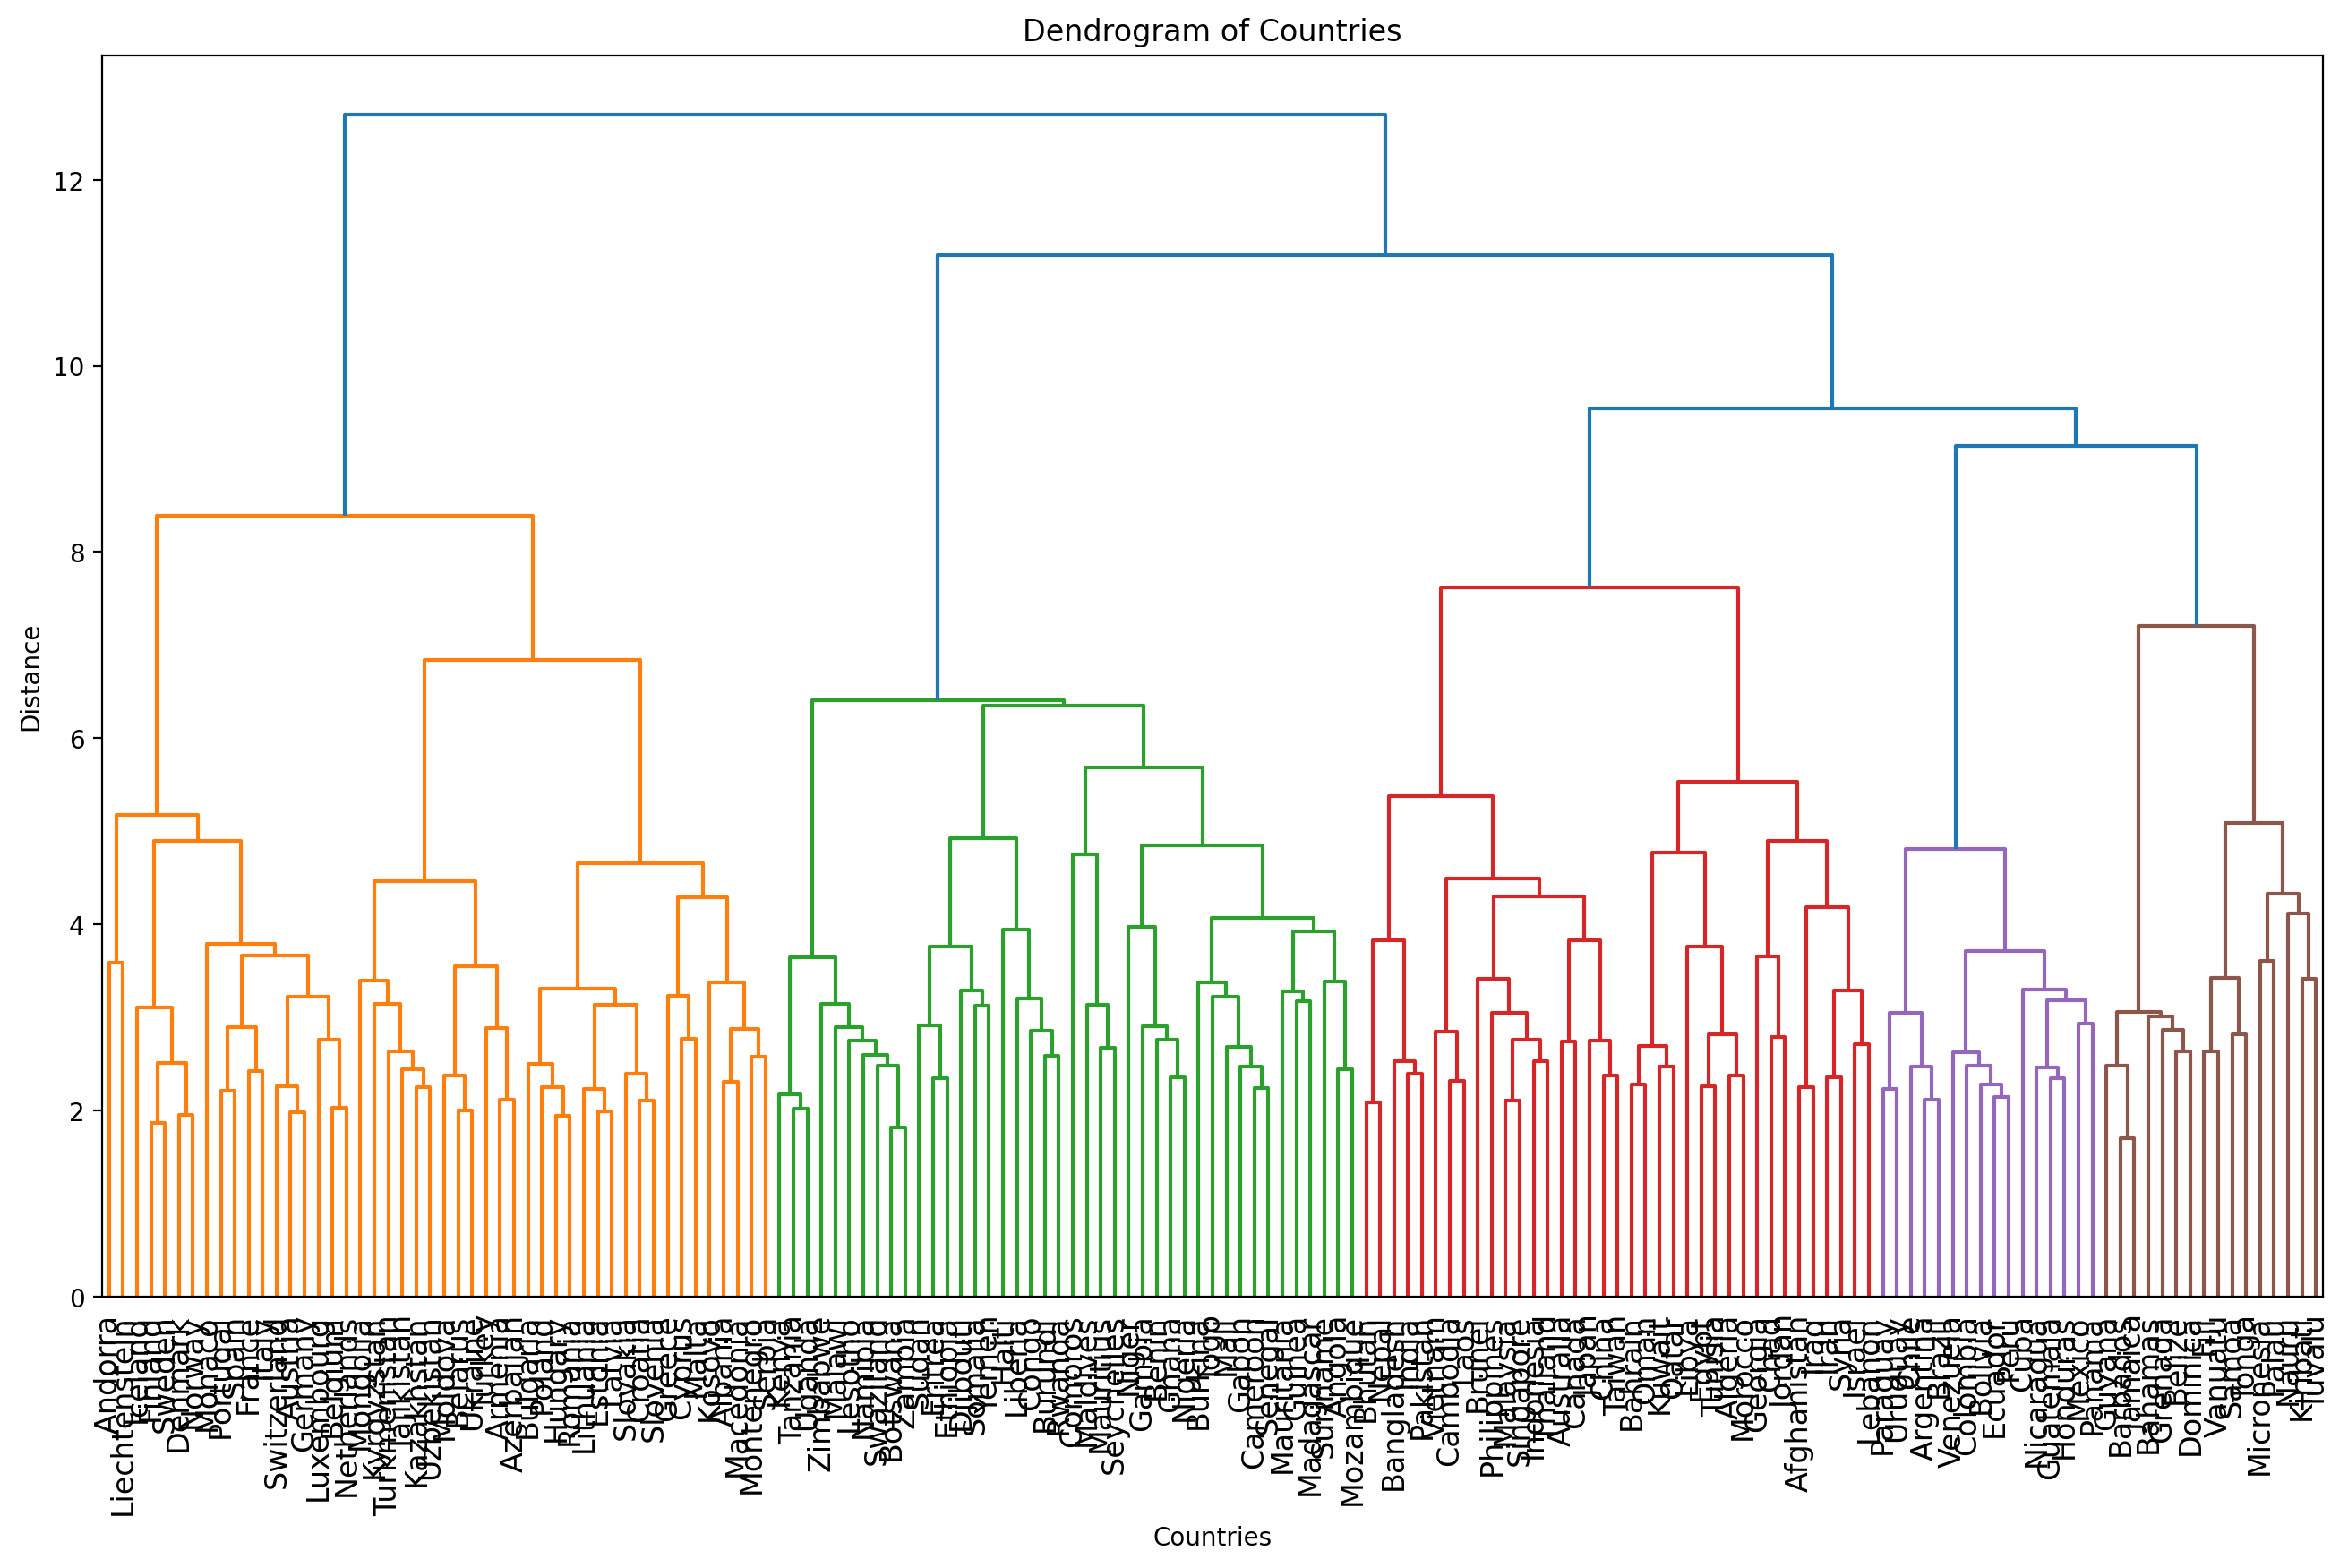

In [8]:
import gensim
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

model = KeyedVectors.load_word2vec_format(
    "data/GoogleNews-vectors-negative300.bin", binary=True
)

with open("data\countries.txt") as f:
    countries = [line.strip() for line in f.readlines()]

# 国名の単語ベクトルを抽出
country_vectors = []
valid_countries = []

for country in countries:
    try:
        country_vectors.append(model[country])
        valid_countries.append(country)
    # 国名がモデルに存在しない場合はスキップ
    except KeyError:
        print(f"{country} not in vocabulary")

# ベクトルを配列に変換
country_vectors = np.array(country_vectors)

linkage_result = linkage(country_vectors, method='ward',metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=valid_countries, leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogram of Countries")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

Antigua & Deps not in vocabulary
Bosnia Herzegovina not in vocabulary
Cape Verde not in vocabulary
Central African Rep not in vocabulary
Congo {Democratic Rep} not in vocabulary
Costa Rica not in vocabulary
Czech Republic not in vocabulary
Dominican Republic not in vocabulary
East Timor not in vocabulary
El Salvador not in vocabulary
Equatorial Guinea not in vocabulary
Guinea-Bissau not in vocabulary
Ireland {Republic} not in vocabulary
Ivory Coast not in vocabulary
Korea North not in vocabulary
Korea South not in vocabulary
Marshall Islands not in vocabulary
Myanmar, {Burma} not in vocabulary
New Zealand not in vocabulary
Papua New Guinea not in vocabulary
Russian Federation not in vocabulary
St Kitts & Nevis not in vocabulary
St Lucia not in vocabulary
Saint Vincent & the Grenadines not in vocabulary
San Marino not in vocabulary
Sao Tome & Principe not in vocabulary
Saudi Arabia not in vocabulary
Sierra Leone not in vocabulary
Solomon Islands not in vocabulary
South Africa not in voc

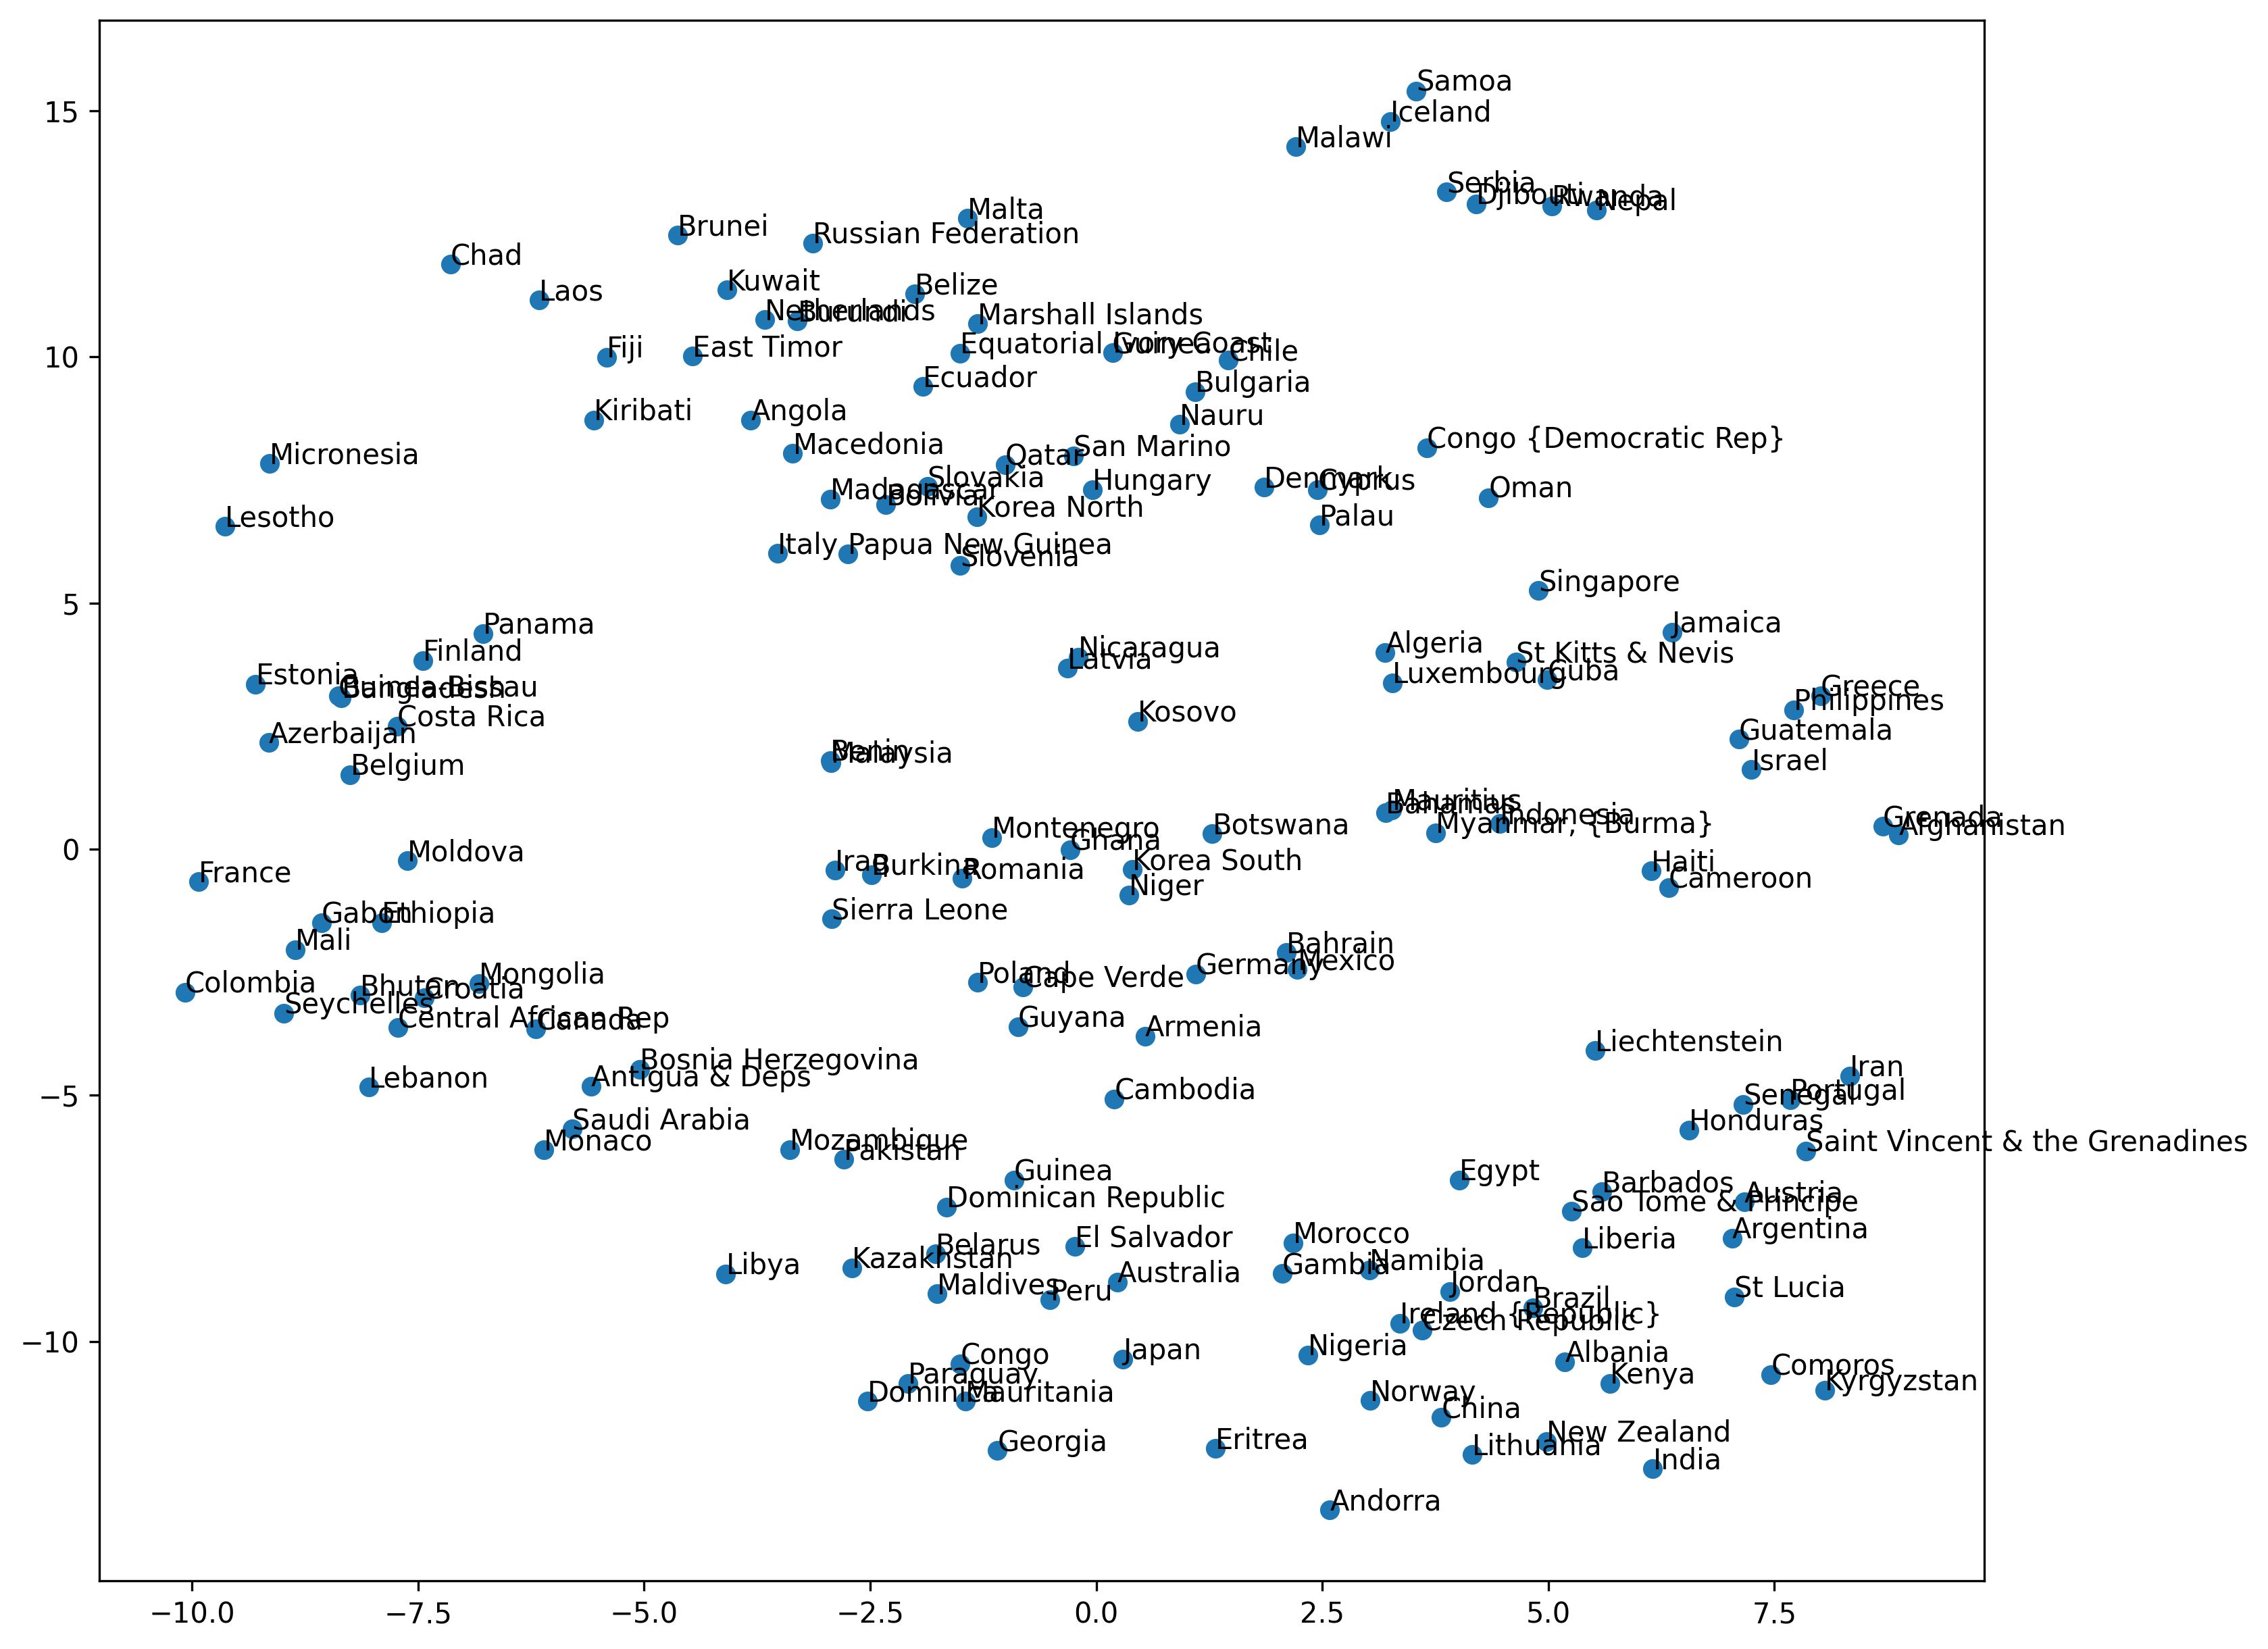

In [11]:
import gensim
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


model = KeyedVectors.load_word2vec_format(
    "data/GoogleNews-vectors-negative300.bin", binary=True
)

with open("data\countries.txt") as f:
    countries = [line.strip() for line in f.readlines()]

# 国名の単語ベクトルを抽出
country_vectors = []
valid_countries = []

for country in countries:
    try:
        country_vectors.append(model[country])
        valid_countries.append(country)
    # 国名がモデルに存在しない場合はスキップ
    except KeyError:
        print(f"{country} not in vocabulary")

# ベクトルを配列に変換
country_vectors = np.array(country_vectors)

# t-SNE
tsne = TSNE()
tsne_results = tsne.fit(country_vectors)

plt.figure(figsize=(12, 10), dpi=300)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
for (x, y), name in zip(tsne.embedding_, countries):
    plt.annotate(name, (x, y))
plt.show()